# Лабораторная работа 3. Метрические методы классификации

## <a href="https://archive.ics.uci.edu/dataset/29/computer+hardware">Компьютерные комплектующие</a>

### Описание набора данных:
Данный набор данных содержит информацию о производительности процессора, описанную в терминах времени его работы, времени машинного цикла и т.д.

### Информация о наборе данных:
Предполагаемые относительные значения производительности были рассчитаны авторами с использованием метода линейной регрессии. Более подробную информацию о том, как были установлены относительные значения производительности, смотрите в их статье (стр. 308-313).

### Назначение набора данных и возможные модели:
1) VendorName -	<b>Категоральное</b> - наименование проивзодителя
2) ModelName - <b>Категоральное</b> - множество уникальных символов
3) MYCT - <b>Целое</b> - время машинного цикла наносекунды
4) MMIN - <b>Целое</b> - минимальное количество килобайт оперативной памяти
5) MMAX - <b>Целое</b> - максимальное количество килобайт оперативной памяти
6) CACH - <b>Целое</b> - количество килобайт кэш-памяти
7) CHMIN - <b>Целое</b> - минимальное количество каналов в единицах
8) CHMAX - <b>Целое</b> - максимальное количество каналов в единицах
9) PRP - <b>Целое</b> - опубликованная относительная производительность
10) ERP - <b>Целое</b> - оцененная относительная производительность по оригинальной статье

Загрузка датасета и подключение библиотек

In [8]:
import pandas as pd
import numpy as np

data_source = 'machine.data'
d = pd.read_table(data_source, delimiter=',',
                  header=None,
                  names=['VendorName','ModelName',
                         'machine cycle','min memory','max memory',
                         'cache memory','min channels','max channels',
                         'pub performance','est performance'])

selected_columns = d.iloc[:, [0, 2, 4, 5, 8]]

selected_columns.head()

,VendorName,machine cycle,max memory,cache memory,pub performance
0,adviser,125,6000,256,198
1,amdahl,29,32000,32,269
2,amdahl,29,32000,32,220
3,amdahl,29,32000,32,172
4,amdahl,29,16000,32,132


In [9]:
selected_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   VendorName       209 non-null    object
 1   machine cycle    209 non-null    int64 
 2   max memory       209 non-null    int64 
 3   cache memory     209 non-null    int64 
 4   pub performance  209 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 8.3+ KB


Попарное признаковое распределение ЭВМ с разделением на классы

C:\Users\colblind\AppData\Local\pypoetry\Cache\virtualenvs\mmo-FzTYR518-py3.12\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (30) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
C:\Users\colblind\AppData\Local\pypoetry\Cache\virtualenvs\mmo-FzTYR518-py3.12\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (30) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
C:\Users\colblind\AppData\Local\pypoetry\Cache\virtualenvs\mmo-FzTYR518-py3.12\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (30) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
C:\Users\colblind\AppData\Local\pypoetry\Cache\virtualenvs\mmo-FzTYR518-py3.12\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: 
The markers list has fewer va

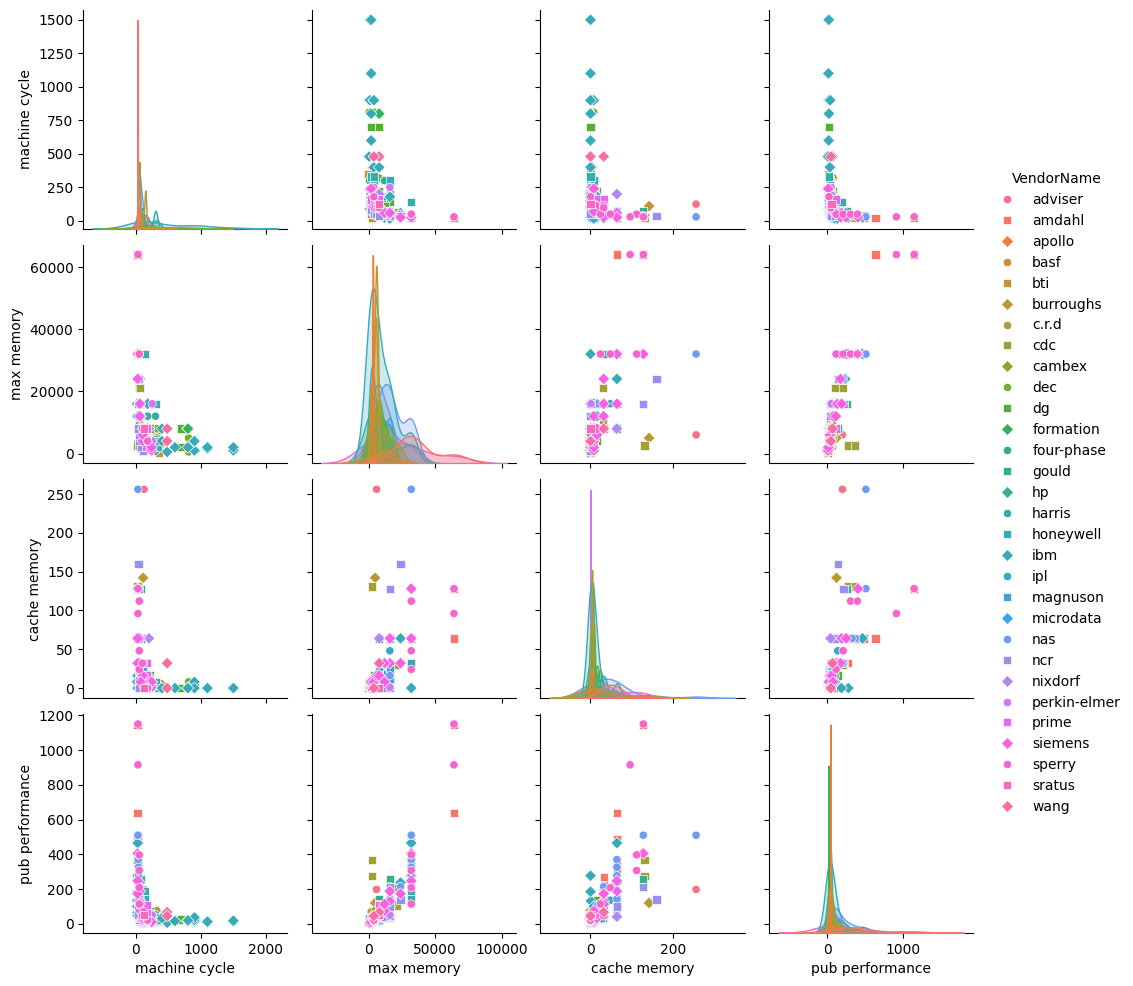

In [10]:
import seaborn as sb


%matplotlib inline

sb.pairplot(selected_columns, hue='VendorName', markers=["o", "s", "D"])

Нахождение ближайшего ЭВМ для заданных параметров

In [11]:
from sklearn.neighbors import KNeighborsClassifier

X_train = selected_columns[['machine cycle', 'max memory', 'cache memory', 'pub performance']]
y_train = selected_columns['VendorName']

K = 4

# Создание классификатора
# Настройка классификатора
knn = KNeighborsClassifier(n_neighbors=K)

# Процедура обучения
knn.fit(X_train.values, y_train)

# Использование классификатора
# Объявление признаков объекта
X_test = np.array([[160, 4000, 2, 30]])

# Получение ответа для нового объекта
target = knn.predict(X_test)

print(target)


['prime']


Общая точность классификатора

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Разделение данных на обучающий и тестовый наборы
X_train, X_holdout, y_train, y_holdout = train_test_split(
    selected_columns.iloc[:, 1:5], # это набор признаков (предикторов), используемых для обучения модели
    selected_columns['VendorName'], # это целевая переменная (метка класса), которую модель должна предсказывать
    test_size=0.3, # это число итераций кросс-валидации, то есть модель будет обучаться и тестироваться 15 раз на разных подмножествах данных
    random_state=15) # это метрика, используемая для оценки качества модели, в данном случае это точность классификации

# Инициализация классификатора метода ближайших соседей (K-Nearest Neighbors) с 5 соседями
knn = KNeighborsClassifier(n_neighbors=5)

# Обучение классификатора на обучающих данных
knn.fit(X_train, y_train)

# Прогнозирование на тестовом наборе
knn_pred = knn.predict(X_holdout)

# Вычисление точности прогнозов
accur = accuracy_score(y_holdout, knn_pred)

print('accuracy: ', accur)

accuracy:  0.25396825396825395


Выбор наиболее оптимального параметра

C:\Users\colblind\AppData\Local\pypoetry\Cache\virtualenvs\mmo-FzTYR518-py3.12\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=15.
  warnings.warn(
C:\Users\colblind\AppData\Local\pypoetry\Cache\virtualenvs\mmo-FzTYR518-py3.12\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=15.
  warnings.warn(
C:\Users\colblind\AppData\Local\pypoetry\Cache\virtualenvs\mmo-FzTYR518-py3.12\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=15.
  warnings.warn(
C:\Users\colblind\AppData\Local\pypoetry\Cache\virtualenvs\mmo-FzTYR518-py3.12\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=15.
  warnings.warn(
C:\U

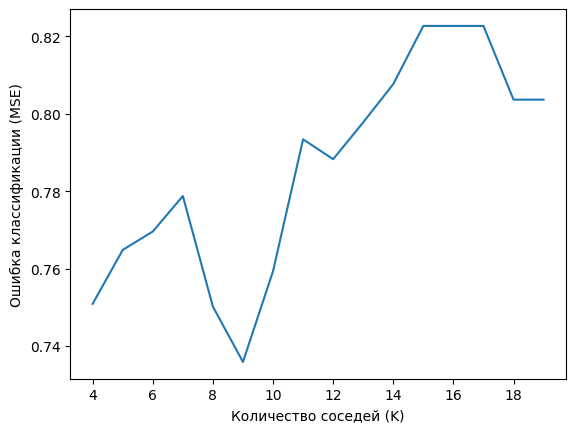

Оптимальные значения K:  [9]


In [13]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Значения параметра K
k_list = list(range(4,20))

# Пустой список для хранения значений точности
cv_scores = []

# В цикле проходим все значения K
for K in k_list:
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(knn, selected_columns.iloc[ : , 1:5 ], selected_columns['VendorName'], cv=15, scoring='accuracy')
    cv_scores.append(scores.mean())

# Вычисляем ошибку (misclassification error), см. примечание в конце
MSE = [1-x for x in cv_scores]

# Строим график
plt.plot(k_list, MSE)
plt.xlabel('Количество соседей (K)')
plt.ylabel('Ошибка классификации (MSE)')
plt.show()

# Получение минимума
k_min = min(MSE)

# Проверка на прочие минимумы
all_k_min = []
for i in range(len(MSE)):
    if MSE[i] <= k_min:
        all_k_min.append(k_list[i])

# Вывод всех K, оптимальные для модели
print('Оптимальные значения K: ', all_k_min)


<i>Среднеквадратичная ошибка (MSE), также известная как квадратичная ошибка, является метрикой, используемой для измерения средней величины квадратов ошибок между фактическими и предсказанными значениями. Это позволяет оценить, насколько сильно отклоняются предсказанные значения от фактических. Чем меньше значение MSE, тем лучше модель способна предсказывать данные. MSE вычисляется путем нахождения среднего значения квадратов разностей между фактическими и предсказанными значениями.</i>